# 으뜸 데이터 분석과 머신러닝
## *13장 합성곱 신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.

### 13.1 고급 데이터 : 패션 MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
 
# keras의 데이터셋의 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) =\
fashion_mnist.load_data()

In [2]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

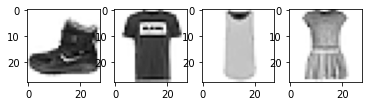

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

In [4]:
print(train_labels[:4])

[9 0 0 3]


In [5]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

labels = train_labels[:4]
for i in labels:
    print('{} : {}'.format(i, mnist_lbl[i]))

9 : Ankle_boot
0 : T-shirt
0 : T-shirt
3 : Dress


### 13.2 Fashion MNIST 데이터 학습시키기

Text(0, 0, 'Dress')

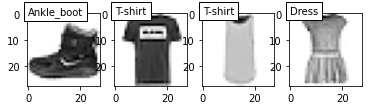

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

ax1.text(0, 0, mnist_lbl[train_labels[0]], bbox={'facecolor': 'white'})
ax2.text(0, 0, mnist_lbl[train_labels[1]], bbox={'facecolor': 'white'})
ax3.text(0, 0, mnist_lbl[train_labels[2]], bbox={'facecolor': 'white'})
ax4.text(0, 0, mnist_lbl[train_labels[3]], bbox={'facecolor': 'white'})

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, test_images = train_images / 200 , test_images / 200
model.fit(train_images, train_labels, epochs=20)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\n테스트 정확도:', test_acc)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4808 - accuracy: 0.8260
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3663 - accuracy: 0.8634
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3296 - accuracy: 0.8783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3072 - accuracy: 0.8869
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2890 - accuracy: 0.8913
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.8968
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9020
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9053
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2410 - accuracy: 0.9093
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.23

### 13.5 이미지 불러오기와 흐림 필터 적용하기

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 100)               12900     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 247,766
Trainable params: 247,766
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Sample image : china.jpg')

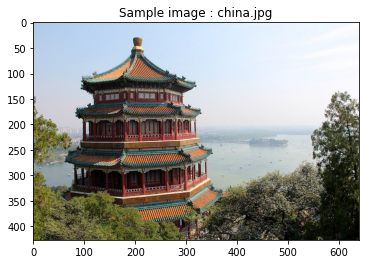

In [9]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import cv2

china = load_sample_image('china.jpg')
plt.imshow(china)
plt.title('Sample image : china.jpg')

In [10]:
print('china.shape =', china.shape)
print('china.dtype =', china.dtype)

china.shape = (427, 640, 3)
china.dtype = uint8


Text(0.5, 1.0, '9x9 Blur filter')

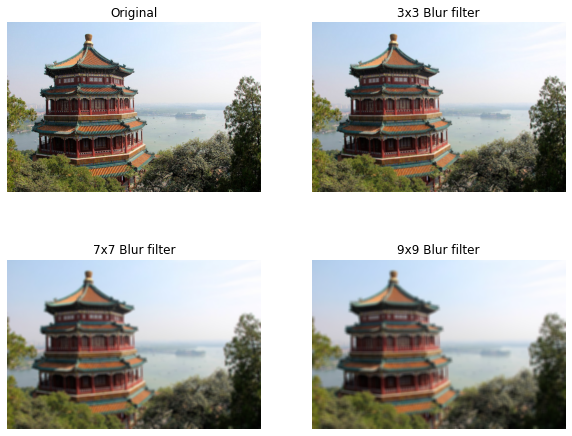

In [11]:
def blur_filter(img, n):
    filter = np.ones((n, n), np.float32) / (n * n)   
    blurred = cv2.filter2D(img, -1, filter)
    return blurred

china = load_sample_image('china.jpg')

fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax[0,0].imshow(china)
ax[0,0].axis('off')
ax[0,0].set_title('Original')

ax[0,1].imshow(blur_filter(china, 3))
ax[0,1].axis('off')
ax[0,1].set_title('3x3 Blur filter')

ax[1,0].imshow(blur_filter(china, 7))
ax[1,0].axis('off')
ax[1,0].set_title('7x7 Blur filter')

ax[1,1].imshow(blur_filter(china, 9))
ax[1,1].axis('off')
ax[1,1].set_title('9x9 Blur filter')

### 13.6 경계를 검출하기 위한 필터들

Text(0.5, 1.0, 'Edge X')

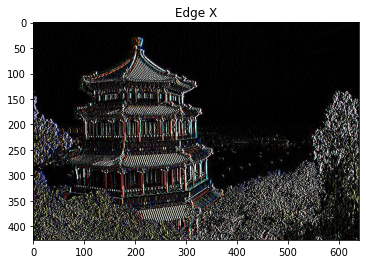

In [12]:
china = load_sample_image('china.jpg')
v_filter = np.array([[-4, 0, 4]]) # 세로 모서리를 강조하는 필터

v_filtered = cv2.filter2D(china, -1, v_filter)

plt.imshow(v_filtered)
plt.title('Edge X')

Text(0.5, 1.0, 'Edge Y')

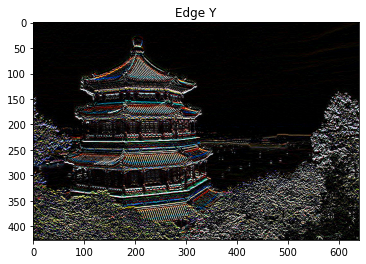

In [13]:
china = load_sample_image('china.jpg')
h_filter = np.array([[ -4],
                     [0],
                     [4]]) # 가로 모서리를 강조하는 필터

h_filtered = cv2.filter2D(china, -1, h_filter)

plt.imshow(h_filtered)
plt.title('Edge Y')

### 13.11 합성곱 신경망의 최종 단계 : 평탄화

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 200, test_images / 200

### 13.12 합성곱 신경망 모델을 만들어 보자

In [16]:
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

### 13.13 합성곱 신경망 모델을 훈련시키고 성능을 알아보자

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, epochs=20, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 15s 5ms/step - loss: 0.4372 - accuracy: 0.8420 - val_loss: 0.3654 - val_accuracy: 0.8708
Epoch 2/20
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2955 - accuracy: 0.8922 - val_loss: 0.2854 - val_accuracy: 0.8947
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2455 - accuracy: 0.9095 - val_loss: 0.3168 - val_accuracy: 0.8865
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2147 - accuracy: 0.9195 - val_loss: 0.2528 - val_accuracy: 0.9079
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1839 - accuracy: 0.9316 - val_loss: 0.2724 - val_accuracy: 0.9061
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1647 - accuracy: 0.9389 - val_loss: 0.2823 - val_accuracy: 0.9055
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1458 - accuracy: 0.9456 - val_loss: 0.2943 - val_accuracy

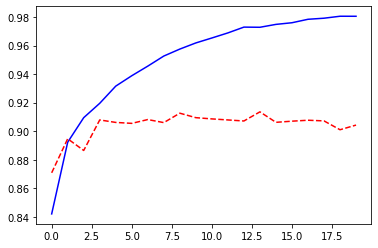

In [19]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.5255 - accuracy: 0.8990
테스트 정확도: 0.8989999890327454


In [21]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

images = test_images[:25]
pred = np.argmax(model.predict(images), axis=1)
print('예측값 =', pred)
print('실제값 =', test_labels[:25])

예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 6 8 0 2 5 7 5 1]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


### 13.14 합성곱 신경망 모델의 결과를 시각화하자

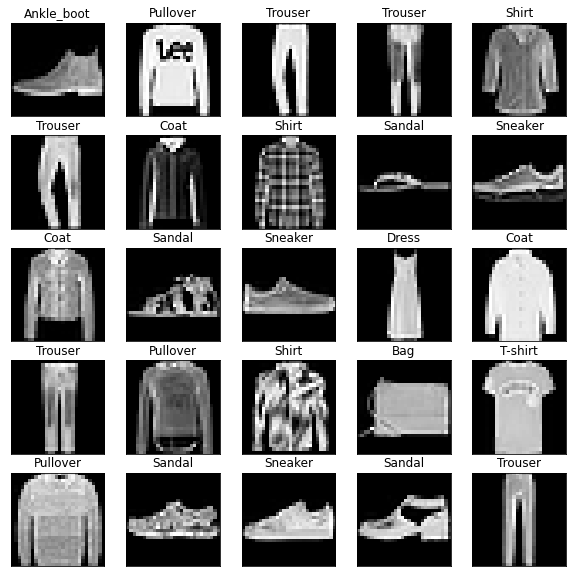

In [22]:
def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row, figsize = (images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
     for j in range(images_per_row):
         if i*images_per_row + j >= n_images: break
         img_idx = i*images_per_row + j
         a_image = images[img_idx].reshape(28,28)
         if n_rows>1: axis = ax[i, j]
         else: axis = ax[j]
         axis.get_xaxis().set_visible(False)
         axis.get_yaxis().set_visible(False)
         label = mnist_lbl[labels[img_idx]]
         axis.set_title(label)
         axis.imshow(a_image, cmap='gray', interpolation='nearest')

plot_images(images, pred, images_per_row = 5)

In [23]:
pred = np.argmax(model.predict(test_images), axis=1)
print('예측값 =', pred)
print('실제값 =', test_labels)

예측값 = [9 2 1 ... 8 1 5]
실제값 = [9 2 1 ... 8 1 5]


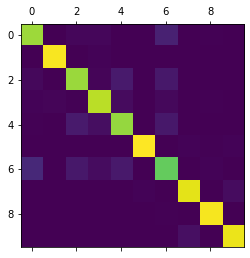

In [24]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(pred, test_labels)
plt.matshow(conf_mat)

In [25]:
print(conf_mat)

[[842   2  19  19   3   1  90   0   4   0]
 [  2 979   1  10   0   0   3   0   0   0]
 [ 20   0 840  13  70   0  63   0   2   0]
 [ 11  12   7 885  30   0  22   0   4   0]
 [  6   2  71  38 829   0  65   0   2   0]
 [  2   0   0   0   0 987   0  11   4   8]
 [115   3  62  32  67   0 752   0   9   1]
 [  0   0   0   2   0   9   0 947   3  34]
 [  2   1   0   1   1   1   5   1 972   0]
 [  0   1   0   0   0   2   0  41   0 957]]


In [26]:
# 드롭아웃을 적용한 모델
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Dropout(.2),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, epochs=20, validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('드롭아웃 적용후 테스트 정확도:', test_acc)

Epoch 1/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5096 - accuracy: 0.8147 - val_loss: 0.3425 - val_accuracy: 0.8721
Epoch 2/20
1407/1407 [==============================] - 6s 5ms/step - loss: 0.3431 - accuracy: 0.8757 - val_loss: 0.3054 - val_accuracy: 0.8885
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3000 - accuracy: 0.8893 - val_loss: 0.2919 - val_accuracy: 0.8954
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2714 - accuracy: 0.9011 - val_loss: 0.2909 - val_accuracy: 0.8944
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2495 - accuracy: 0.9082 - val_loss: 0.2537 - val_accuracy: 0.9063
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2333 - accuracy: 0.9137 - val_loss: 0.2479 - val_accuracy: 0.9131
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2187 - accuracy: 0.9196 - val_loss: 0.2569 - val_accuracy:

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.9144
테스트 정확도: 0.9143999814987183
